In [94]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from keras.regularizers import L1
from keras.regularizers import L2

## Data preparation

In [2]:
def data_prepare(sequences):
    res = np.zeros(shape=(len(sequences), 10001), dtype=int)
    for i, sequence in enumerate(sequences):
        res[i, np.array(sequence)] = 1
    return res[:, 1:].copy()

(X_train_raw, y_train), (X_test_raw, y_test) = imdb.load_data(
    num_words = 10001,
    start_char = 0,
    oov_char = 0,
    index_from = 0
)

X_test = data_prepare(X_test_raw)
X_train = data_prepare(X_train_raw)

print("X_test.shape =", X_test.shape)
print("X_train.shape =", X_train.shape)

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/rgegotek/anaconda3/lib/python3.8/site-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/rgegotek/anaconda3/lib/python3.8/site-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this,

X_test.shape = (25000, 10000)
X_train.shape = (25000, 10000)


# Model

### Define model

In [4]:
model1 = keras.Sequential()

layer1 = keras.layers.Dense(units=400, activation='relu')
layer2 = keras.layers.Dense(units=100, activation='relu')
output_layer = keras.layers.Dense(units=1, activation='sigmoid')

model1.add(layer1)
model1.add(layer2)
model1.add(output_layer)

### Compile model

In [5]:
model1.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Fit model & plot result

In [50]:
history1 = model1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

In [6]:
def draw_plot(ax, x, value, ylabel):
    ax.plot(x, value, linewidth=1)
    ax.set_xlabel("epoch", fontsize=8)
    ax.set_ylabel(ylabel, fontsize=8)

def generate_plots(history):
    his = history.history
    epoch = history.epoch
    plt.figure(figsize=(10, 7), dpi=80)
    plt.rcParams.update({'font.size': 8})
    ax1 = plt.subplot(221)
    ax2 = plt.subplot(222)
    ax3 = plt.subplot(223)
    ax4 = plt.subplot(224)
    draw_plot(ax1, epoch, his['loss'], "Training loss")
    draw_plot(ax2, epoch, his['val_loss'], "Validation loss")
    draw_plot(ax3, epoch, his['accuracy'], "Training accuracy")
    draw_plot(ax4, epoch, his['val_accuracy'], "Validation accuracy")
    plt.show()
    
generate_plots(history1)

### Evaluate model

In [ ]:
model1.evaluate(X_test, y_test)

### Helper method

In [7]:
def prepare_model(optimizer='sgd', regularizer=None):
    model = keras.Sequential()
    layer1 = keras.layers.Dense(units=256, activation='relu', kernel_regularizer=regularizer)
    layer2 = keras.layers.Dense(units=64, activation='relu', kernel_regularizer=regularizer)
    output_layer = keras.layers.Dense(units=1, activation='sigmoid')
    model.add(layer1)
    model.add(layer2)
    model.add(output_layer)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [8]:
def fit_and_plot(regualizer = keras.regularizers.L2(0.001), optimizer='sgd'):
    model_ = prepare_model(optimizer=optimizer, regularizer=regualizer)
    history_ = model_.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)
    generate_plots(history_)

## L1 regularization

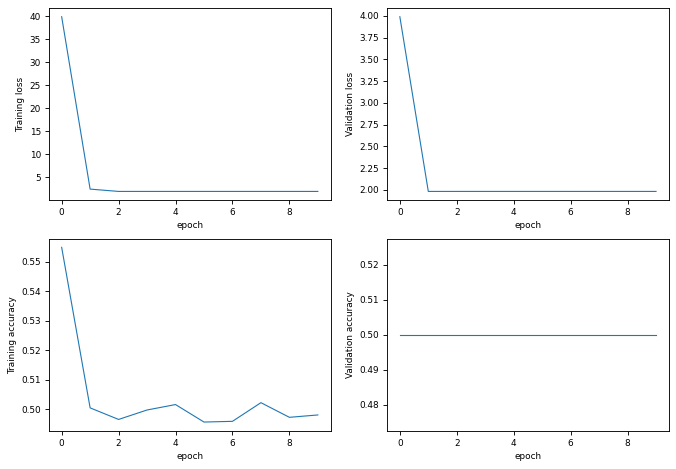

In [55]:
fit_and_plot(L1(0.01))

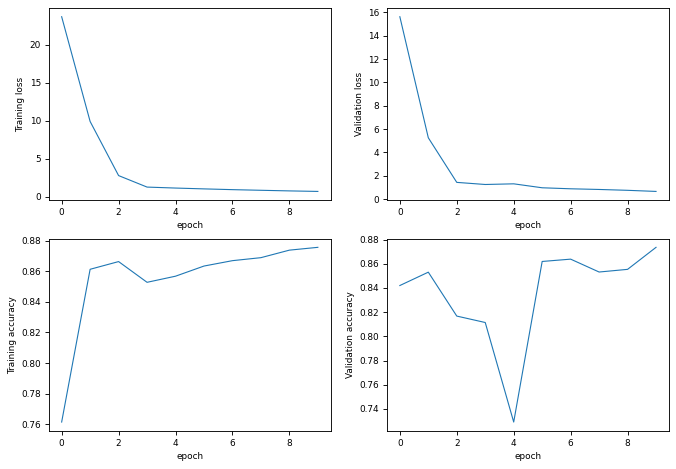

In [56]:
fit_and_plot(L1(0.001))

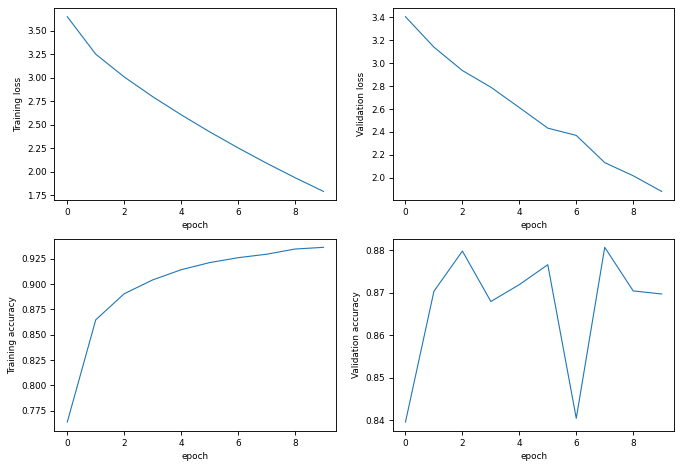

In [57]:
fit_and_plot(L1(0.0001))

## L2 regularization

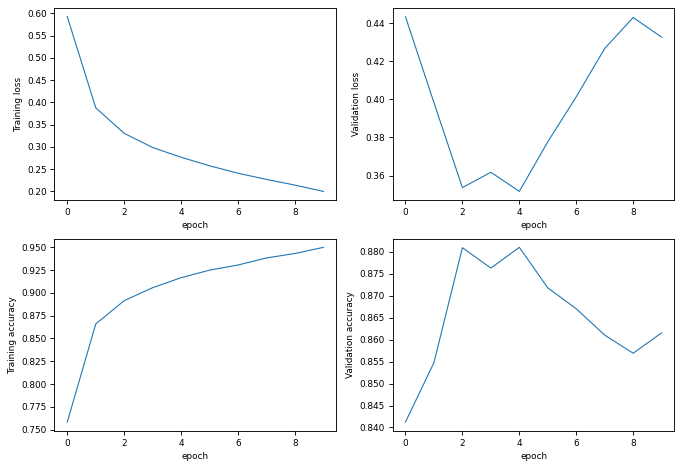

In [58]:
fit_and_plot(L2(0.0001))

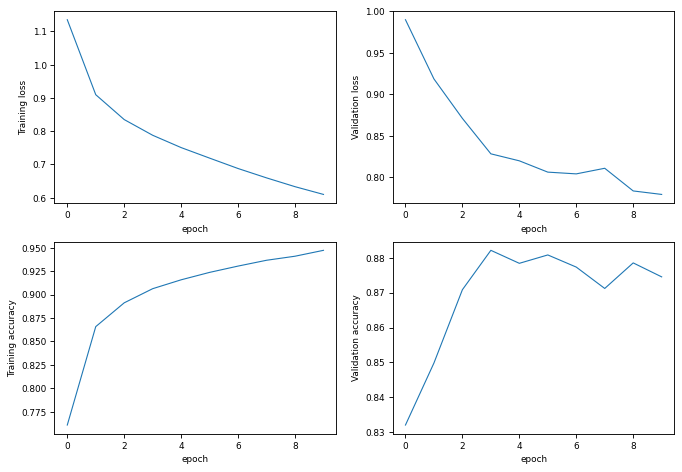

In [59]:
fit_and_plot(L2(0.001))

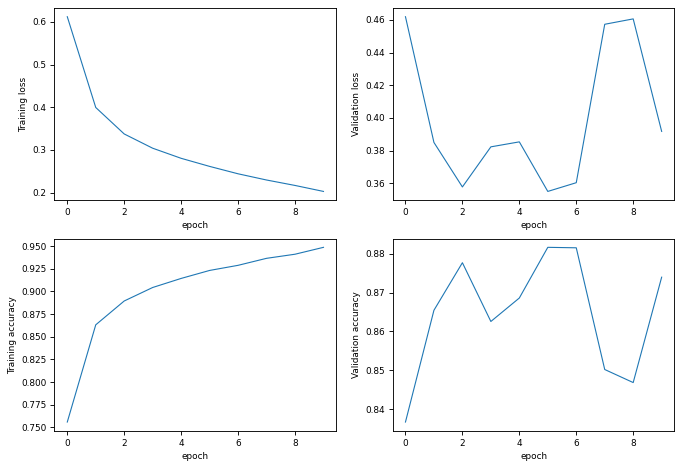

In [60]:
fit_and_plot(L2(0.0001))

# Different optimizers

Since L2 regularization with coefficient of 0.001 looks most promising, we'll use that regularizer for the rest of models.

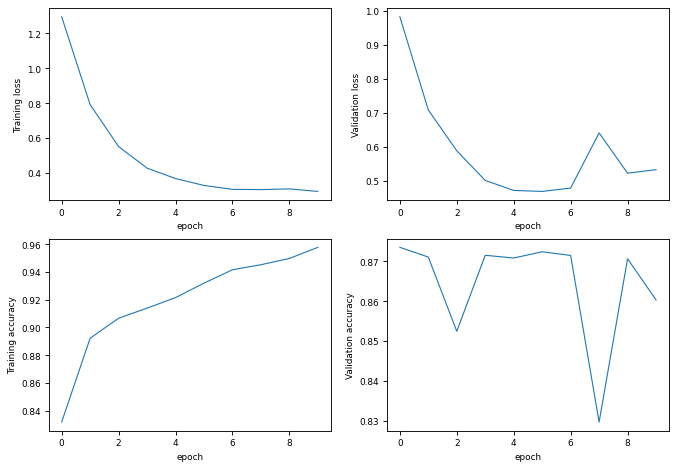

In [17]:
fit_and_plot(optimizer=SGD(momentum=0.9))

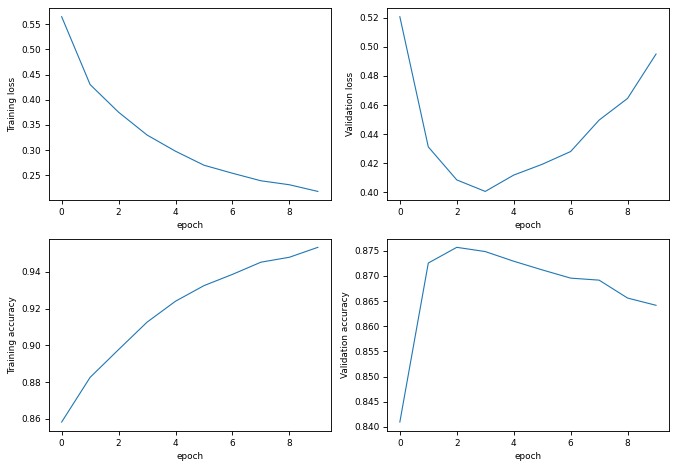

In [19]:
fit_and_plot(optimizer=Nadam())

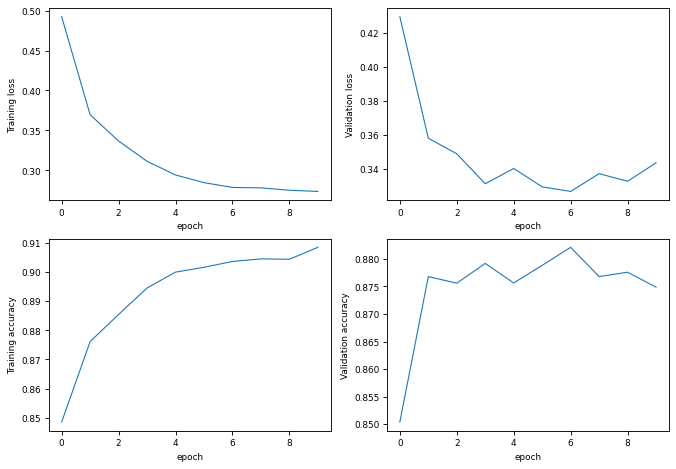

In [20]:
fit_and_plot(optimizer=RMSprop())

# 

# Report

Nero network models are designed for two hidden layers, rewith 256 and 64 units respectively,  while setting the sgd optimizer \
As part of the L1 and L2 regralization, the results for the same SGD optamilizer and for different lambda values were checked: \
0.01 \
0.001 \
0.0001 \
For  lambda 0.01 the curves were constant functions of 50% for accurancy and 2.0 for loss. \
The increase in the lambda value resulted in a better increase in ccurancy to the level of approx. 88%. \
The best model was observed for the lambda parameter of 0.001, where the loss function was more flat and smooth
For L2 regularization, the results were very similar to those for L1 regularization

In further testing, 3 optimizers were used: \
SGD with a momentum factor of 0.9 - no improvement, accuracy at the level of approx 87% \
RMSProp - no improvement, accuracy at the level of approx 87.5% \
Nadam - no improvement, accuracy at the level of approx 88% \
None of the models with applied optimization gave better results, the best of the whole group was the RMSProp optimizer.